# Implementing K-Nearest Neighbor Classifier

In [1]:
## Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Know Your Data

In [12]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)

In [13]:
data = wine.frame
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
## data columns
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [15]:
## shape
data.shape

(178, 14)

In [21]:
## info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [18]:
## summary
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [19]:
## null values
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [20]:
## duplicates
data.duplicated().sum()

0

In [22]:
data['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
## unique value counts

for col in data.columns:
    print(f"{col}:",data[col].nunique())

alcohol: 126
malic_acid: 133
ash: 79
alcalinity_of_ash: 63
magnesium: 53
total_phenols: 97
flavanoids: 132
nonflavanoid_phenols: 39
proanthocyanins: 101
color_intensity: 132
hue: 78
od280/od315_of_diluted_wines: 122
proline: 121
target: 3


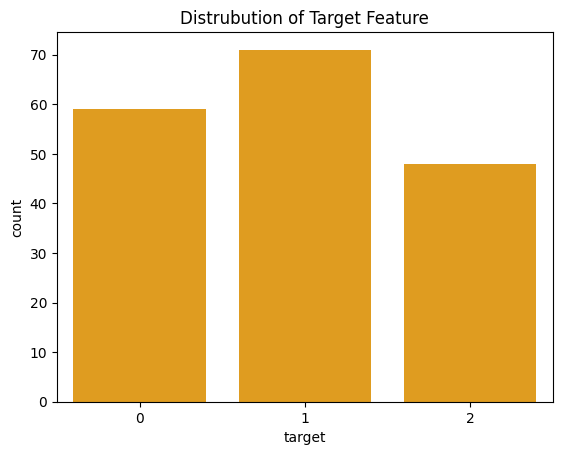

In [54]:
sns.countplot(x=data['target'],color='orange')
plt.title("Distrubution of Target Feature")
plt.xlabel('target')
plt.ylabel('count')
plt.show()

## Visualizing Numerical Features

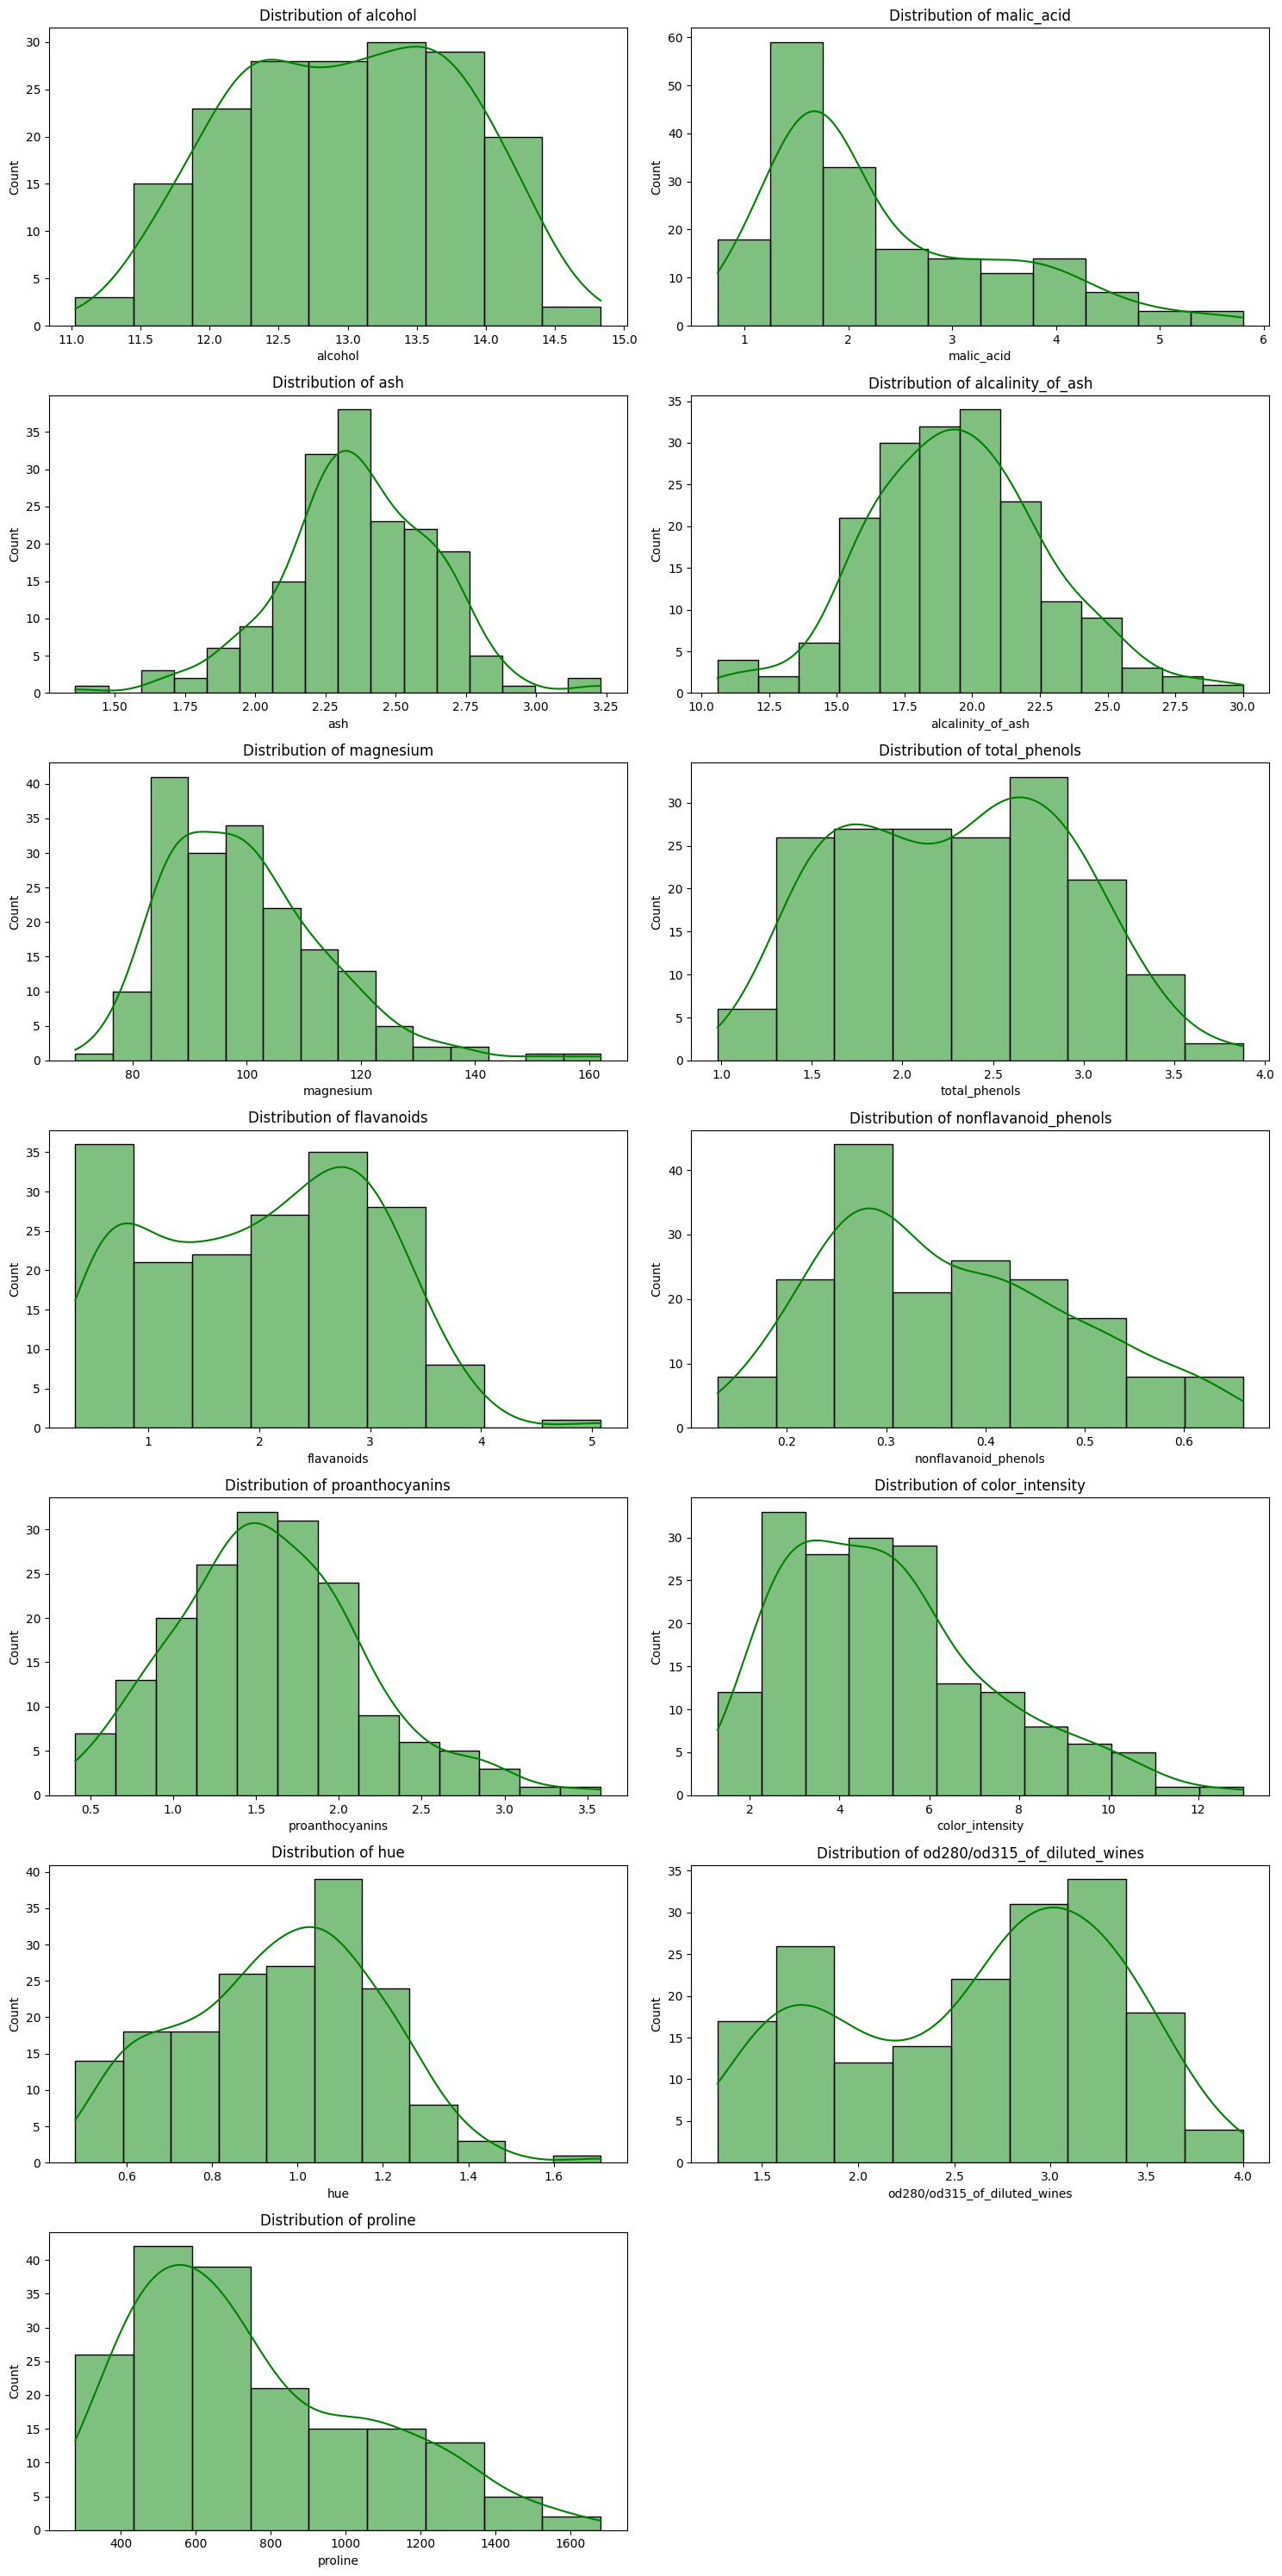

In [ ]:
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

n_cols = 2
n_rows = (len(features)+1)//2

plt.figure(figsize=(15,30))

for i,col in enumerate(features,1):
    plt.subplot(n_rows,n_cols,i)
    sns.histplot(data[col],kde=True,color='green')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show() 

### Insights:

1. **Alcohol:**
    * Mostly ranges between 12.5 to 14.5 — helps separate wine types.

2. **Malic Acid:**
    * Spread across 1 to 5, with a concentration under 3.

3. **Ash & Alkalinity:**
    * Fairly symmetric, but ash is more narrowly distributed.

4. **Magnesium & Proline:**
    * Show more spread, especially proline, which has a long tail—great for feature importance.

5. **Phenols (Total, Flavanoids, Nonflavanoid):**
    * Discriminative—flavanoids show strong class variance.

6. **Color Intensity:**
    * Right-skewed; useful for identifying darker vs. lighter wines.

7. **Hue & OD280/OD315:**
    * Display good variation, possibly relevant for class separation.

## HeatMap of Numerical Features

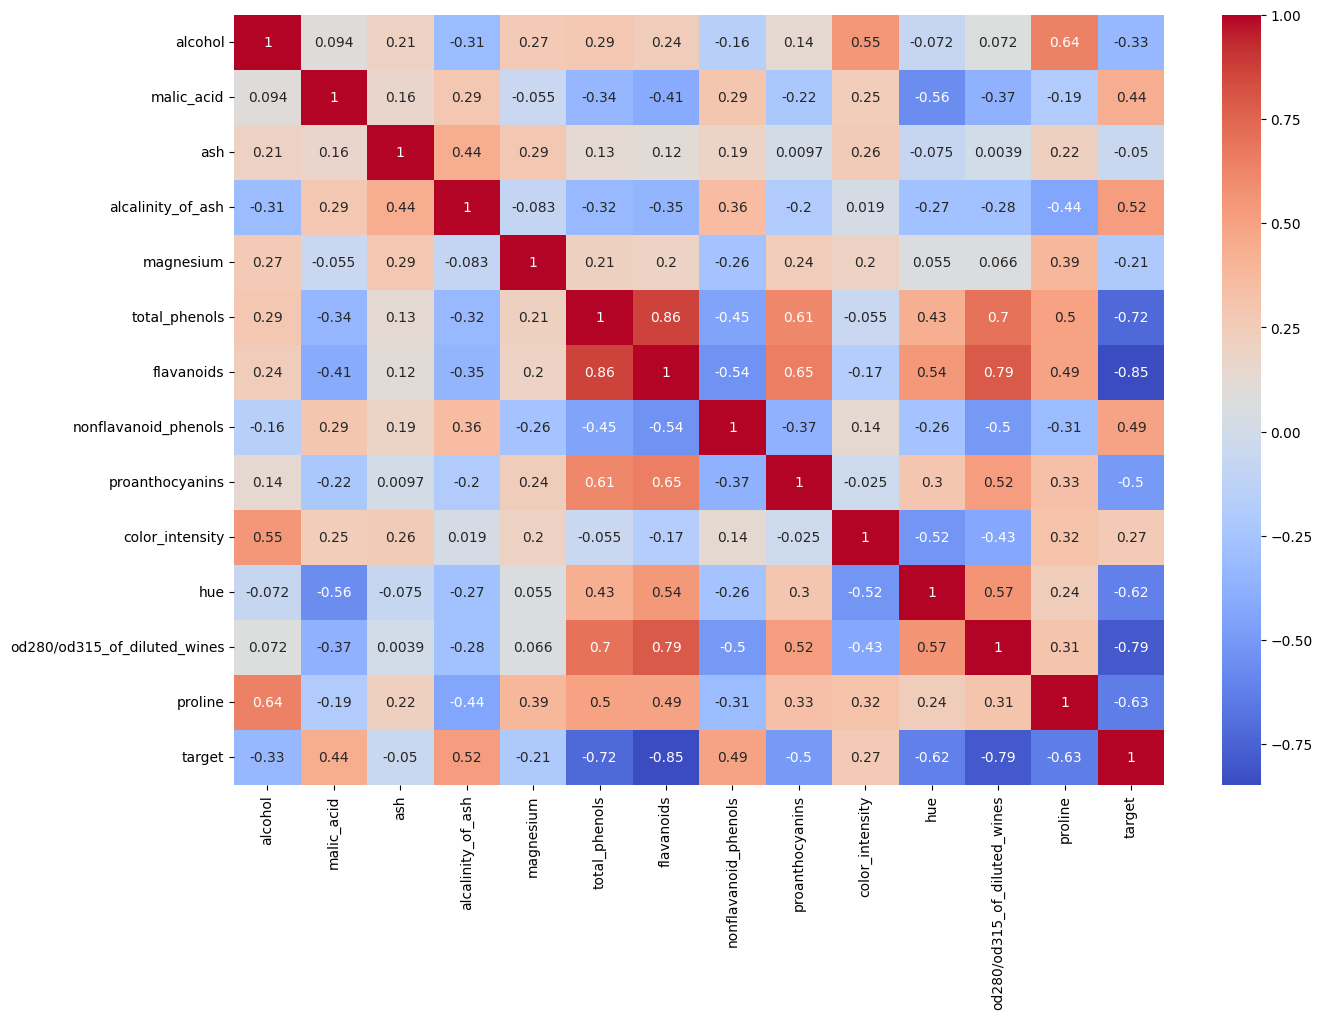

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True, cmap='coolwarm')
plt.show()

### Insights:

* Flavanoids and Total Phenols are very tightly linked and strongly negatively correlated with the wine target class — making them powerful predictors.

* OD280/OD315, Proline, and Hue also show strong negative correlations with the target.

* Features like Malic Acid and Nonflavanoid Phenols are positively correlated with the target class.

* Alcohol has high positive correlation with Proline and Color Intensity, indicating a meaningful cluster of related chemical features.

## Visualizing Pairplot

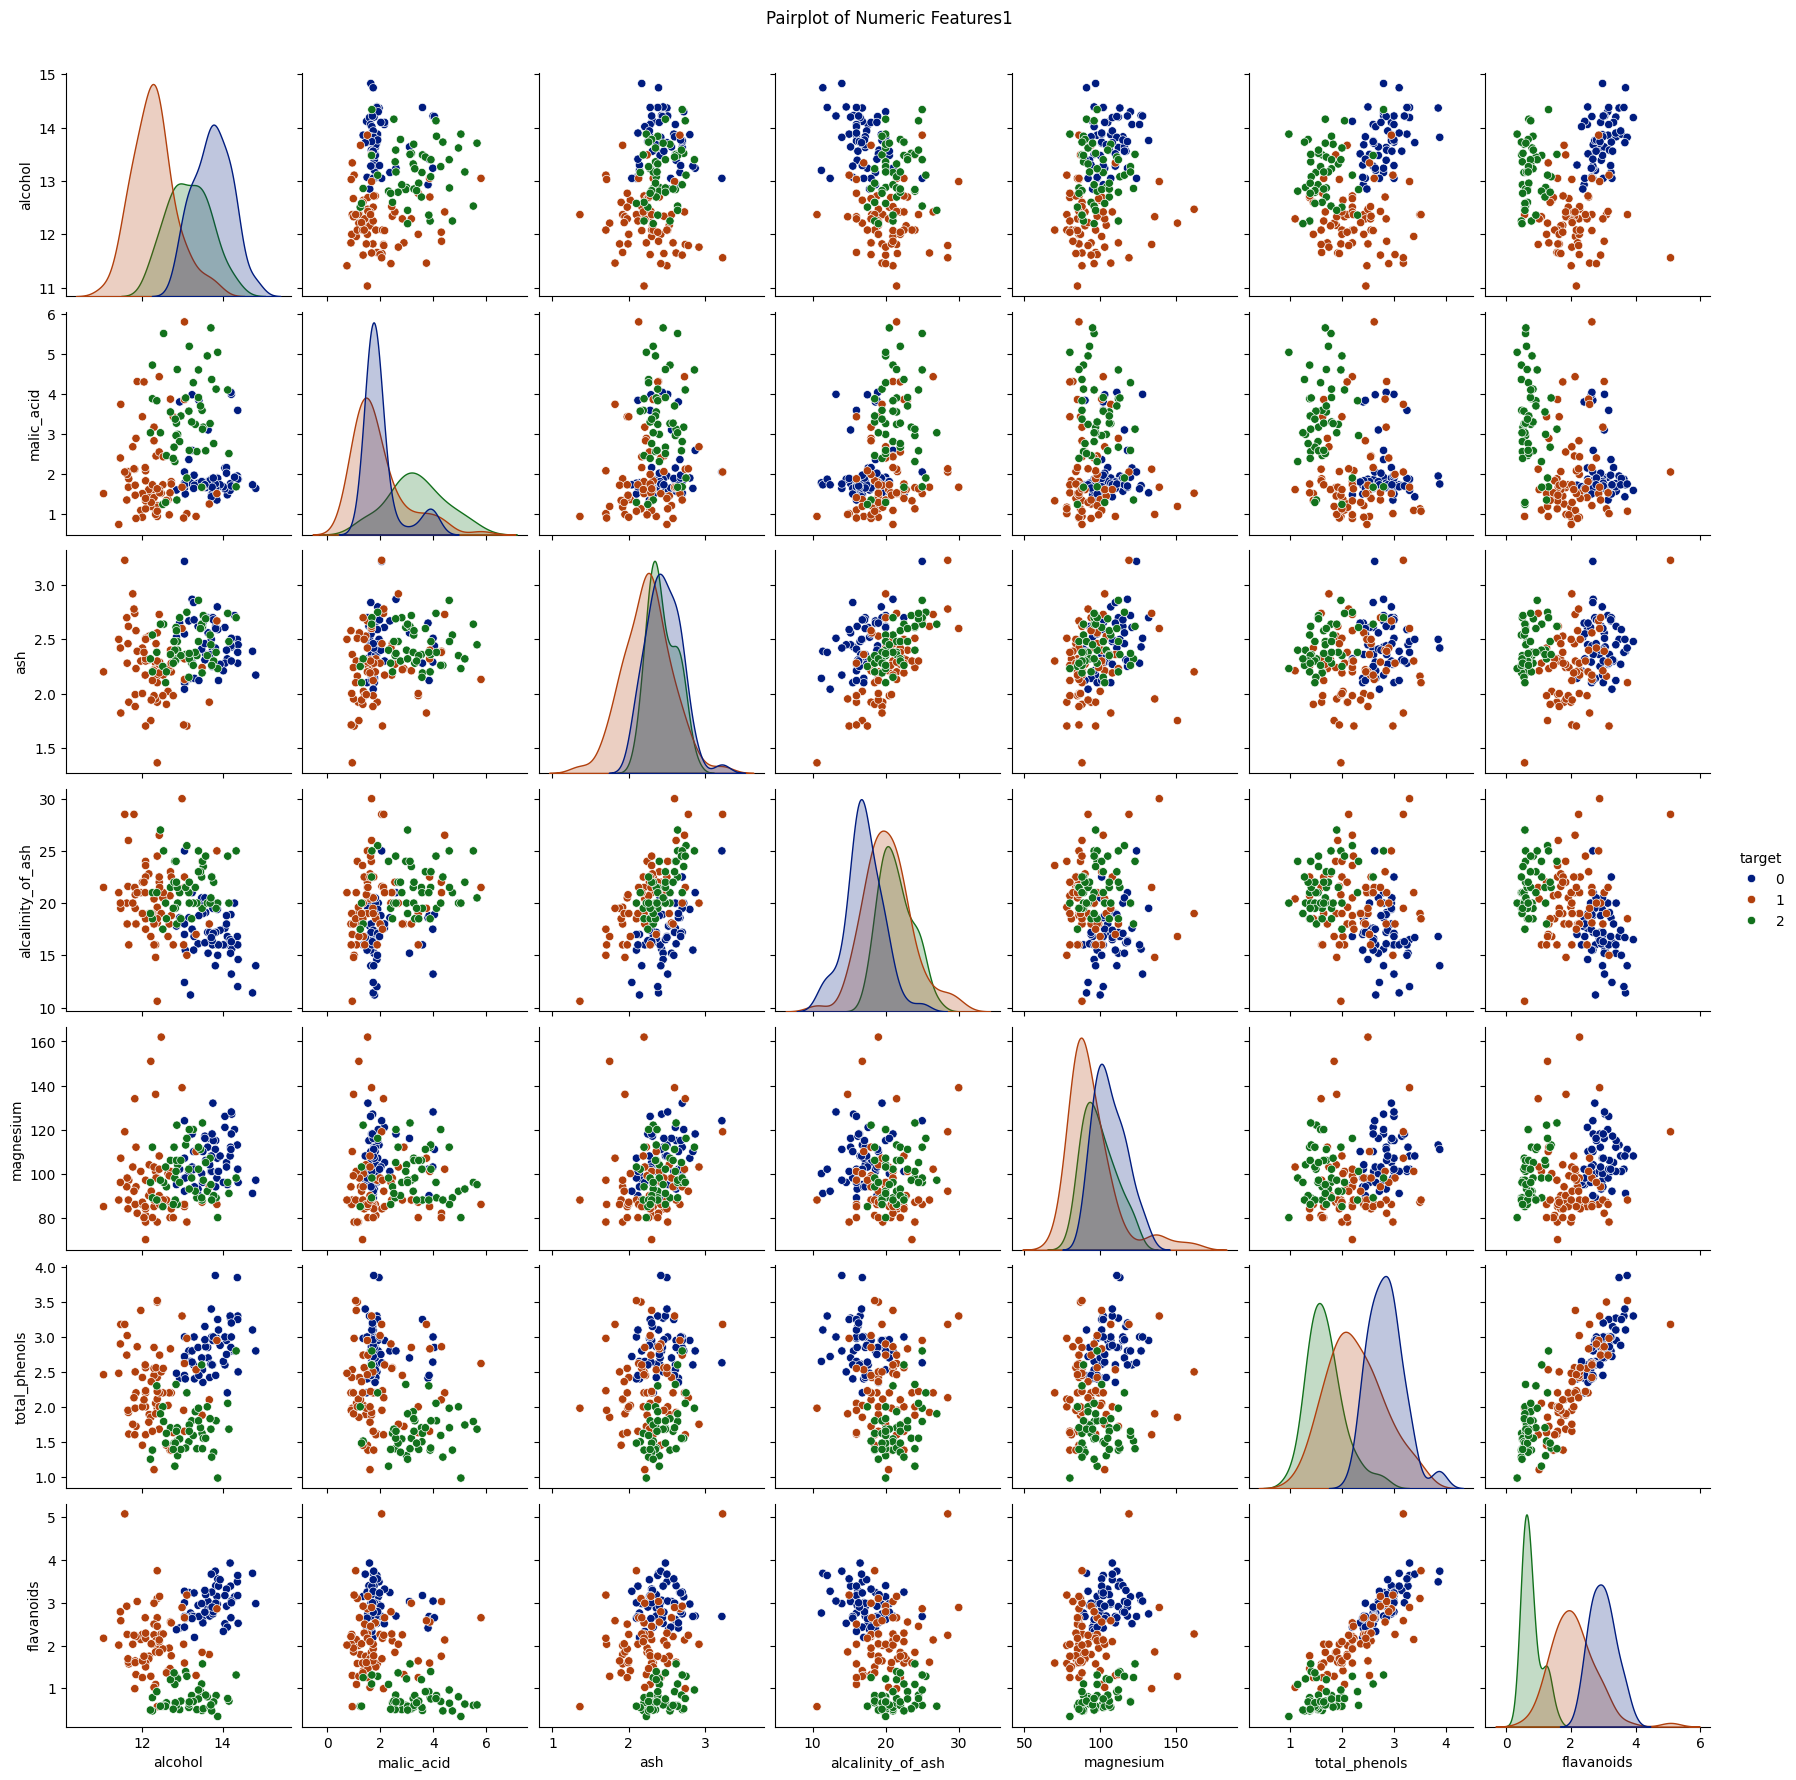

In [60]:
features1 = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids']

sns.pairplot(data[features1 + ['target']],hue='target',diag_kind='kde',palette='dark')
plt.suptitle("Pairplot of Numeric Features1", y=1.02)

plt.show()

### Insights:

* Features like alcohol, flavanoids, and total phenols—these features help cluster the wine classes distinctly.

* Some feature combinations (e.g., malic acid vs. ash) show more blend between classes, indicating weaker discriminative power.

* Certain classes (like Class 0 or Class 2) form tight clusters, suggesting strong internal similarity.

* Features like total phenols and flavanoids are highly correlated—possibly redundant.

<Figure size 1500x1000 with 0 Axes>

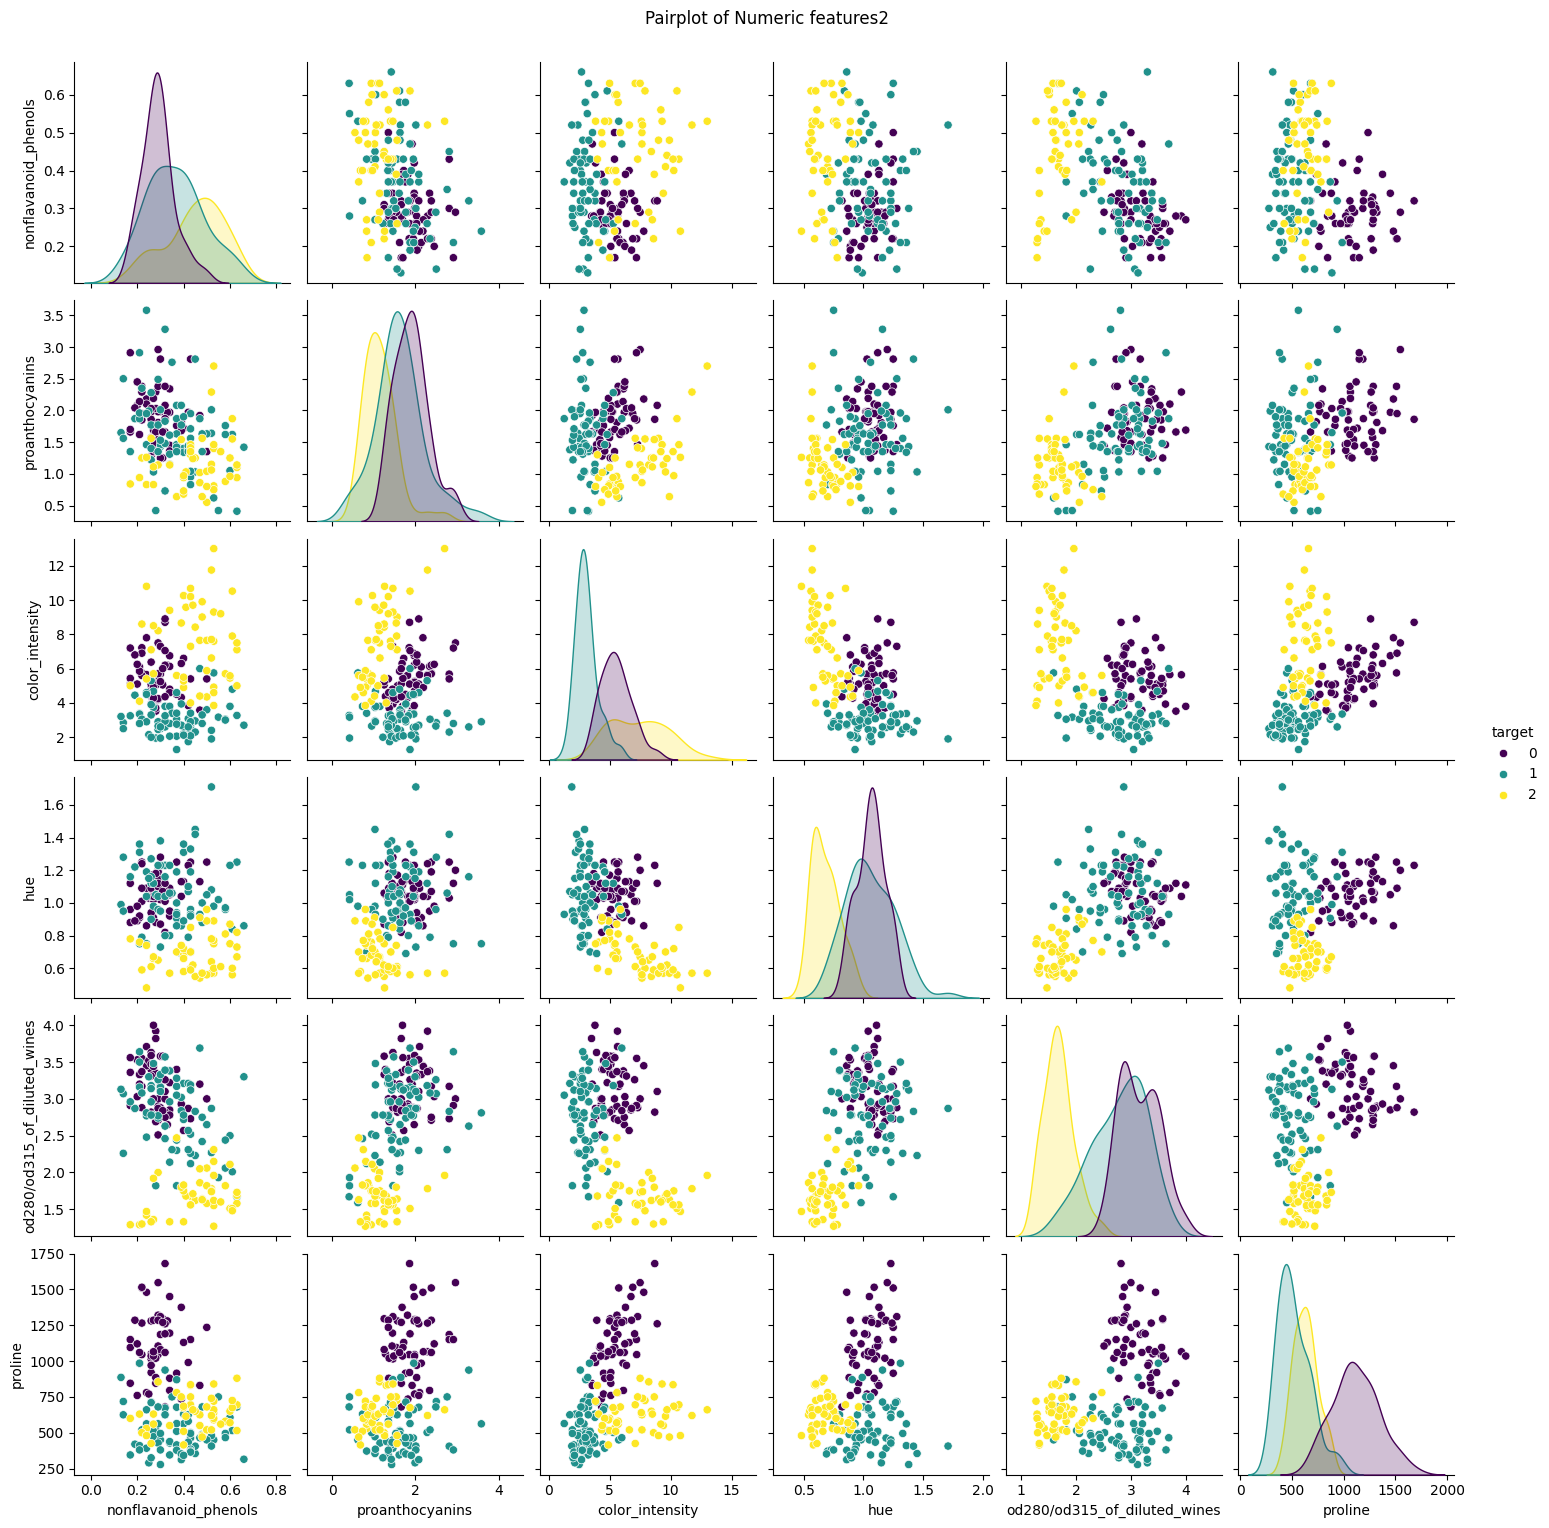

In [65]:
features2 = ['nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

plt.figure(figsize=(15,10))
sns.pairplot(data[features2 + ['target']],hue='target',palette='viridis')
plt.suptitle("Pairplot of Numeric features2",y=1.02)
plt.show()

### insights:
* Features like proline, OD280/OD315, and color intensity show clean clustering, especially for class 2 (purple).

* Nonflavanoid phenols and hue present more inter-class mixing—might be weaker predictors on their own.

* Combinations like proline vs. OD280/OD315 provide excellent visual distinction between all three classes—great candidates for decision boundaries without dimensionality reduction.

* Distributions along diagonals suggest non-normality in several features, which could affect models sensitive to that (e.g., logistic regression).

## Splitting the data

In [73]:
from sklearn.model_selection import train_test_split

X = data.drop('target',axis=1)
y = data['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


### Experimenting with different k values

In [77]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_scaled,y_train)

    y_pred = knn.predict(X_test_scaled)

    scores.append(accuracy_score(y_test,y_pred))

In [82]:
scores

[0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222]

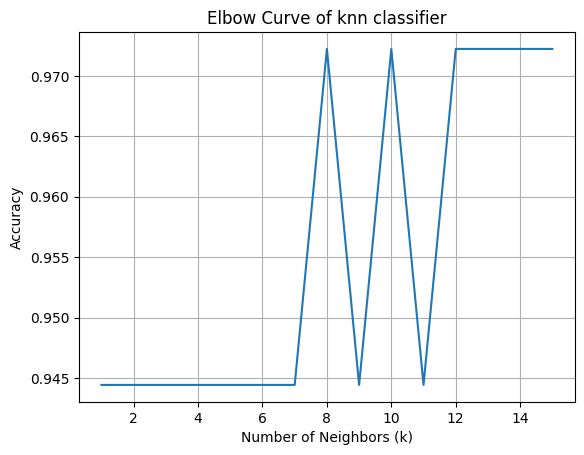

In [81]:
plt.plot(range(1,16), scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Elbow Curve of knn classifier")
plt.grid(True)
plt.show()

### Interpretation of Elbow curve:

* Using a value lower than 8 might cause the model to overfit (too sensitive to noise).

* Using a much larger k could lead to underfitting (too smooth, missing local structure).

* The spot is where you get high accuracy without overfitting—in this curve, that would be: k = 8.

In [83]:
knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train_scaled,y_train)

y_pred8 = knn8.predict(X_test_scaled)
print("Accuracy of 8 kneighbors:",accuracy_score(y_test,y_pred8))
print("Confusion Matrix of 8 kneighbors:\n",confusion_matrix(y_test,y_pred8))

Accuracy of 8 kneighbors: 0.9722222222222222
Confusion Matrix of 8 kneighbors:
 [[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]


### Interpretation of Confusion Matrix:

* Class 0 (Cultivar 0): All 14 instances correctly classified.

* Class 1 (Cultivar 1): 13 correctly predicted, 1 misclassified as class 0.

* Class 2 (Cultivar 2): All 8 correctly predicted.

## Visualizing  Decision Boundaries

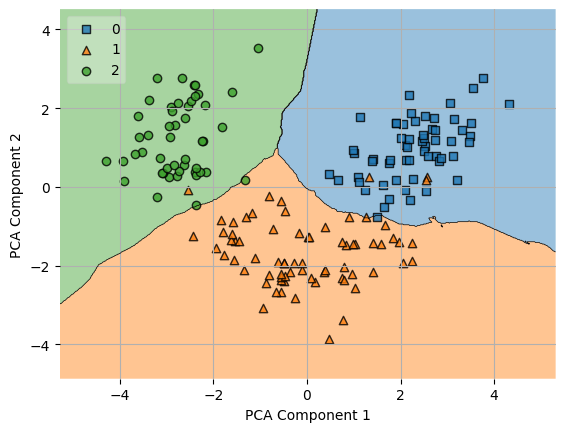

In [89]:
from sklearn.decomposition import PCA

# Load and scale data
wine = load_wine()
X, y = wine.data, wine.target

X_scaled = scaler.fit_transform(X)

## reduce to 2D with PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## train the model using training data

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_pca, y)

## Visualize the decision regions of the trained KNN model
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_pca, y, clf=knn, legend=2)  

# Label the axes and add a title to the plot
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


### Interpretation of Decision Boundaries:

* Each class is mostly contained within its own colored region.

* There's a tiny bit of overlap or confusion around the class boundaries—especially between class 0 and class 1—but it looks minimal.

* This aligns well with the confusion matrix, where only one sample from class 1 was misclassified.